In [6]:
# Librerias 

In [ ]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates
import seaborn as sns 


from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, cross_validate
import xgboost as xg
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.metrics import mean_squared_error

In [7]:
new_df_mesos = pd.read_csv('../DATASETS/new_df_mesos.csv').set_index('month_year')
new_df_dies = pd.read_csv('../DATASETS/new_df_dies.csv').set_index('Dates')
community_mesos = pd.read_csv('../DATASETS/community_mesos.csv').set_index('month_year')
community_dies = pd.read_csv('../DATASETS/community_dies.csv').set_index('Dates')


df_filtered = pd.read_csv('../DATASETS/filtered_df.csv')
df = pd.read_csv('../DATASETS/df_crimes.csv')

In [8]:
new_df_dies.index = pd.to_datetime(new_df_dies.index)
df_all_days = new_df_dies.loc[new_df_dies.index.year >=2015]
df_all_days = df_all_days[df_all_days.index < '2018-09-1'].copy()
df_all_days = df_all_days.drop(columns=['cos(1,freq=A-DEC)'])

In [9]:
def split_data(data,X,y,test_size,district):
    idx_train, idx_test = train_test_split(data.index, test_size=test_size, shuffle=False)
    if district == True:
        X_train, y_train = X.loc[idx_train.unique(), :], X.loc[idx_test.unique(), :]
        X_test, y_test = y.loc[idx_train.unique()], y.loc[idx_test.unique()]
    else:
        X_train, y_train = X.loc[idx_train, :], X.loc[idx_test, :]
        X_test, y_test = y.loc[idx_train], y.loc[idx_test]
    
    return X_train, y_train, X_test, y_test

## TEST VERANO 2018

In [10]:
X = df_all_days.drop(columns = ['Agressions', 'New Years'])
y = df_all_days['Agressions']

X_train, X_test, y_train, y_test  = split_data(y, X, y, 61,False)

model = xg.XGBRegressor(n_estimators=500, learning_rate = 0.01, max_depth= 3, subsample = 0.5, colsample_bytree = 0.4, colsample_bylevel = 1, random_state=0) 
model.fit(X_train, y_train) 
xg_pred_train_y = model.predict(X_train) 
xg_pred_test_y = model.predict(X_test)

test = y_test.to_frame()
test['Pred']  = xg_pred_test_y
test['Agressions'] = test.iloc[-4697:].values
test['Mean model'] = test['Agressions'].mean()
test['MAPE'] = np.mean(np.abs((test['Agressions'] - test['Pred'])/test['Agressions']))*100
test['MAPE mean'] = np.mean(np.abs((test['Agressions'] - test['Mean model'])/test['Agressions']))*100
test['SMAPE'] = np.mean(np.abs((test['Pred']-test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['SMAPE mean'] = np.mean(np.abs((test['Mean model'] - test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['MAE'] = np.mean(np.abs(test['Agressions'] - test['Pred']))
test['MAE mean'] = np.mean(np.abs(test['Agressions'] - test['Mean model']))
test['Metrica nomb'] = (test['Agressions'] < test['Pred']).sum()/len(test['Pred'])*100
test['Metrica nomb mean'] = (test['Agressions'] < test['Mean model']).sum()/len(test['Pred'])*100
test['RMSE'] = np.sqrt(mean_squared_error(test['Agressions'], test['Pred']))
test['RMSE mean'] = np.sqrt(mean_squared_error(test['Agressions'], test['Mean model']))
test['MSE'] = mean_squared_error(test['Agressions'], test['Pred'])

test

,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean,MSE
Dates,,,,,,,,,,,,,,
2018-07-02,6.0,6.403933,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-07-03,2.0,6.031678,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-07-04,7.0,5.827950,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-07-05,4.0,5.781966,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-07-06,11.0,6.452989,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,3.0,6.074005,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-08-28,4.0,6.021876,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338
2018-08-29,6.0,5.941212,6.754098,34.148967,39.220091,28.24301,32.535462,1.840644,2.110723,55.737705,50.819672,2.505262,2.791414,6.276338


In [11]:
train = y_train.to_frame()
train['Pred']  = xg_pred_train_y
d = pd.concat([train.reset_index().set_index(['Dates','Agressions', 'Pred']), test.reset_index().set_index(['Dates','Agressions', 'Pred'])], axis=1, join = 'outer')
d = d.reset_index().iloc[:,:-12]
d = d.set_index('Dates')
d = d[-30:]

dies_ver = pd.DataFrame()
dies_ver = d[['Agressions', 'Pred']]
dies_ver = dies_ver.rename(columns={'Pred':'XGBoost'})

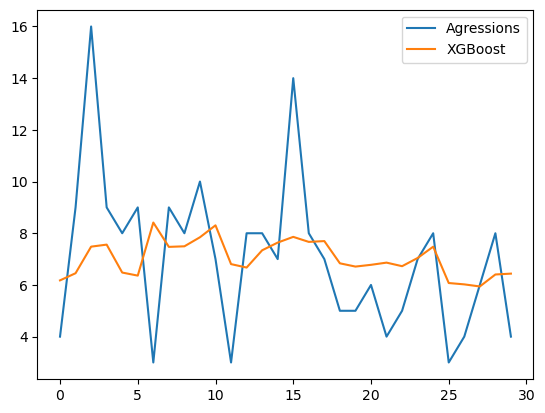

In [12]:
dies_ver = dies_ver.reset_index()
dies_ver.plot(y=["Agressions","XGBoost"])
plt.show()

In [13]:
pred_ver = test[['Agressions', 'Pred']]
pred_ver = pred_ver.rename(columns={'Pred':'XGBoost'})

In [14]:
pred_ver

,Agressions,XGBoost
Dates,,
2018-07-02,6.0,6.403933
2018-07-03,2.0,6.031678
2018-07-04,7.0,5.827950
2018-07-05,4.0,5.781966
2018-07-06,11.0,6.452989
...,...,...
2018-08-27,3.0,6.074005
2018-08-28,4.0,6.021876
2018-08-29,6.0,5.941212


In [15]:
pred_ver.to_csv('../DATASETS/pred_models_verano_2018.csv')

# TEST VERANO POR COMUNIDAD 2017

In [16]:
community_dies = community_dies[community_dies.index < '2017-08-31'].copy()

In [17]:
#XGBoost
X= community_dies.drop(columns = 'Agressions')
y = community_dies['Agressions']

X_train, X_test, y_train, y_test  = split_data(y, X, y,4697,True)
model= xg.XGBRegressor(n_estimators=500, learning_rate = 0.01, max_depth= 3, subsample = 0.5, colsample_bytree = 0.4, colsample_bylevel = 1, random_state=0)
model.fit(X_train, y_train) 
rf_pred_train_y = model.predict(X_train) 
rf_pred_test_y = model.predict(X_test)

y_test = y_test.to_frame()
test = y_test


test['Agressions'] = test.iloc[-4697:].values

test['Pred'] = rf_pred_test_y
test['Mean model'] = test['Agressions'].mean()
test['MAPE'] = np.mean(np.abs((test['Agressions'] - test['Pred'])/test['Agressions']))*100
test['MAPE mean'] = np.mean(np.abs((test['Agressions'] - test['Mean model'])/test['Agressions']))*100
test['SMAPE'] = np.mean(np.abs((test['Pred']-test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['SMAPE mean'] = np.mean(np.abs((test['Mean model'] - test['Agressions'])/((np.abs(test['Mean model']) + np.abs(test['Agressions']))/2)))*100
test['MAE'] = np.mean(np.abs(test['Agressions'] - test['Pred']))
test['MAE mean'] = np.mean(np.abs(test['Agressions'] - test['Mean model']))
test['Metrica nomb'] = (test['Agressions'] < test['Pred']).sum()/len(test['Pred'])*100
test['Metrica nomb mean'] = (test['Agressions'] < test['Mean model']).sum()/len(test['Pred'])*100
test['RMSE'] = np.sqrt(mean_squared_error(test['Agressions'], test['Pred']))
test['RMSE mean'] = np.sqrt(mean_squared_error(test['Agressions'], test['Mean model']))
test

,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean
Dates,,,,,,,,,,,,,
2017-07-01,0,0.229531,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.299340,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,1,0.414004,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.162007,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.110611,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,0,0.191895,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-08-30,0,0.020570,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-08-30,1,0.065696,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552


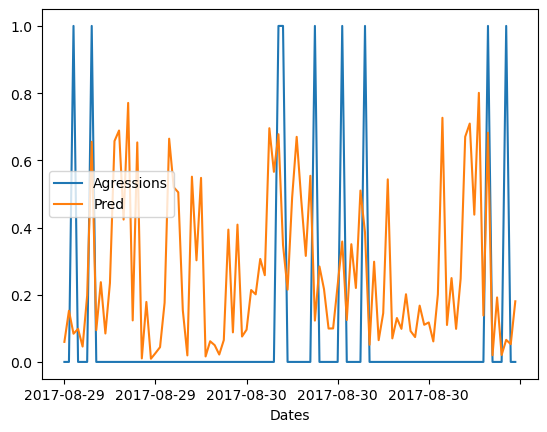

In [18]:
test_filter1 = test[-100:]
test_filter = test
#test_filter = test_filter.reset_index()
test_filter1.plot(y=["Agressions","Pred"])
plt.show()

In [19]:
test_filter

,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean
Dates,,,,,,,,,,,,,
2017-07-01,0,0.229531,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.299340,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,1,0.414004,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.162007,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-07-01,0,0.110611,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,0,0.191895,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-08-30,0,0.020570,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552
2017-08-30,1,0.065696,0.091548,inf,inf,190.284319,197.363335,0.285919,0.167971,91.739408,91.739408,0.386176,0.320552


In [20]:
#test_filter = test_filter.set_index('Dates')
pred_com_ver_17 = test_filter[['Agressions', 'Pred']]
pred_com_ver_17 = pred_com_ver_17.rename(columns={'Pred':'XGBoost'})

In [21]:
pred_com_ver_17.to_csv('../DATASETS/pred_models_com_ver_2017.csv')

# Predicción annual 2016

In [22]:
df_mesos = new_df_mesos.drop(columns = ['agressions_2_month_avg', 'agressions_6_month_avg', 'agressions_lag_1', 'agressions_lag_2', 'trend'])
df_mesos = df_mesos[df_mesos.index < '2017-01']

In [23]:
#XGBoost

df_mesos = new_df_mesos.drop(columns = ['agressions_2_month_avg', 'agressions_6_month_avg', 'agressions_lag_1', 'agressions_lag_2', 'trend'])
df_mesos = df_mesos[df_mesos.index < '2017-01']

X= df_mesos.drop(columns = 'Agressions')
y = df_mesos['Agressions']

X_train, X_test, y_train, y_test  = split_data(y, X, y, 12,False)

random_grid = { 'max_depth': [3, 5, 6, 10, 15, 20],
                  'learning_rate': [0.01, 0.1, 0.2, 0.3],
                  'subsample': np.arange(0.5, 1.0, 0.1),
                  'colsample_bytree': np.arange(0.4, 1.0, 0.1),
                  'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
                  'n_estimators': [100, 500, 1000]}

model = xg.XGBRegressor(random_state=0)
random_search = RandomizedSearchCV(model, param_distributions=random_grid, scoring='neg_mean_absolute_error', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
xg_pred_train = random_search.predict(X_train) 
xg_pred_test = random_search.predict(X_test)

print(random_search.best_estimator_)
print(random_search.best_params_)

test = y_test.to_frame()
test['Agressions'] = test.iloc[-12:].values
test['Pred']  = xg_pred_test

test['Mean model'] = test['Agressions'].mean()
test['MAPE'] = np.mean(np.abs((test['Agressions'] - test['Pred'])/test['Agressions']))*100
test['MAPE mean'] = np.mean(np.abs((test['Agressions'] - test['Mean model'])/test['Agressions']))*100
test['SMAPE'] = np.mean(np.abs((test['Pred']-test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['SMAPE mean'] = np.mean(np.abs((test['Mean model'] - test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['MAE'] = np.mean(np.abs(test['Agressions'] - test['Pred']))
test['MAE mean'] = np.mean(np.abs(test['Agressions'] - test['Mean model']))
test['Metrica nomb'] = (test['Agressions'] < test['Pred']).sum()/len(test['Pred'])*100
test['Metrica nomb mean'] = (test['Agressions'] < test['Mean model']).sum()/len(test['Pred'])*100
test['RMSE'] = np.sqrt(mean_squared_error(test['Agressions'], test['Pred']))
test['RMSE mean'] = np.sqrt(mean_squared_error(test['Agressions'], test['Mean model']))
test['MSE'] = mean_squared_error(test['Agressions'], test['Pred'])

test

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=None, colsample_bytree=0.6,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=0, ...)
{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}


,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean,MSE
month_year,,,,,,,,,,,,,,
2016-01,194.0,205.538330,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-02,161.0,140.032059,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-03,175.0,167.008240,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-04,165.0,167.540100,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-05,198.0,185.687668,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-06,229.0,205.832352,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-07,236.0,213.645660,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-08,217.0,193.925995,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409
2016-09,185.0,206.683838,188.5,8.996992,14.29406,9.154636,14.396568,17.023491,25.666667,41.666667,50.0,19.388151,30.139951,375.900409


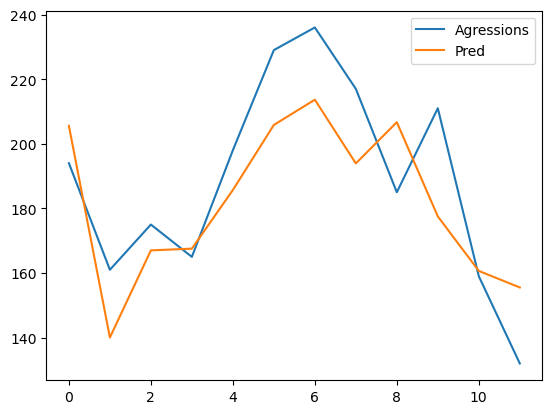

In [24]:
test_filter_months = test.reset_index()
test_filter_months.plot(y=["Agressions","Pred"])
plt.show()

In [25]:
pred_any_16 = test[['Agressions', 'Pred']]
pred_any_16 = pred_any_16.rename(columns={'Pred':'XGBoost'})
pred_any_16

,Agressions,XGBoost
month_year,,
2016-01,194.0,205.538330
2016-02,161.0,140.032059
2016-03,175.0,167.008240
2016-04,165.0,167.540100
2016-05,198.0,185.687668
2016-06,229.0,205.832352
2016-07,236.0,213.645660
2016-08,217.0,193.925995
2016-09,185.0,206.683838


In [26]:
pred_any_16.to_csv('../DATASETS/pred_models_ano_2016.csv')